# Bank Note Authentication

<IPython.core.display.Javascript object>

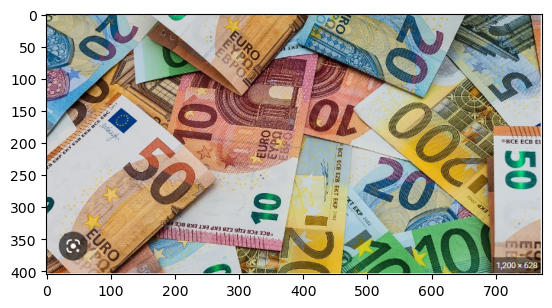

In [1]:
import matplotlib.image as mpimg
money_img = mpimg.imread('money1 img.png')                                                                     
plt.imshow(money_img)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from warnings import filterwarnings
filterwarnings('ignore')

## Read the data 

In [3]:
d = pd.read_csv('BankNote_Authentication.csv')
df = d.copy()

## Gain insight of the data 

In [4]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [5]:
df.tail()

,variance,skewness,curtosis,entropy,class
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1
1371,-2.54190,-0.65804,2.6842,1.19520,1


In [6]:
df.shape

(1372, 5)

In [7]:
df.size

6860

## Information of dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


#### Observation
* There are total 5 columns and each columns having 1372 entries
* Total instances are 6860
* Dtype are (float, integer)

## Checking for the null values

In [9]:
df.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

#### Observation
* there are no null values in the data sets

## Univariate Analysis

array([[<AxesSubplot:title={'center':'variance'}>,
        <AxesSubplot:title={'center':'skewness'}>],
       [<AxesSubplot:title={'center':'curtosis'}>,
        <AxesSubplot:title={'center':'entropy'}>],
       [<AxesSubplot:title={'center':'class'}>, <AxesSubplot:>]],
      dtype=object)

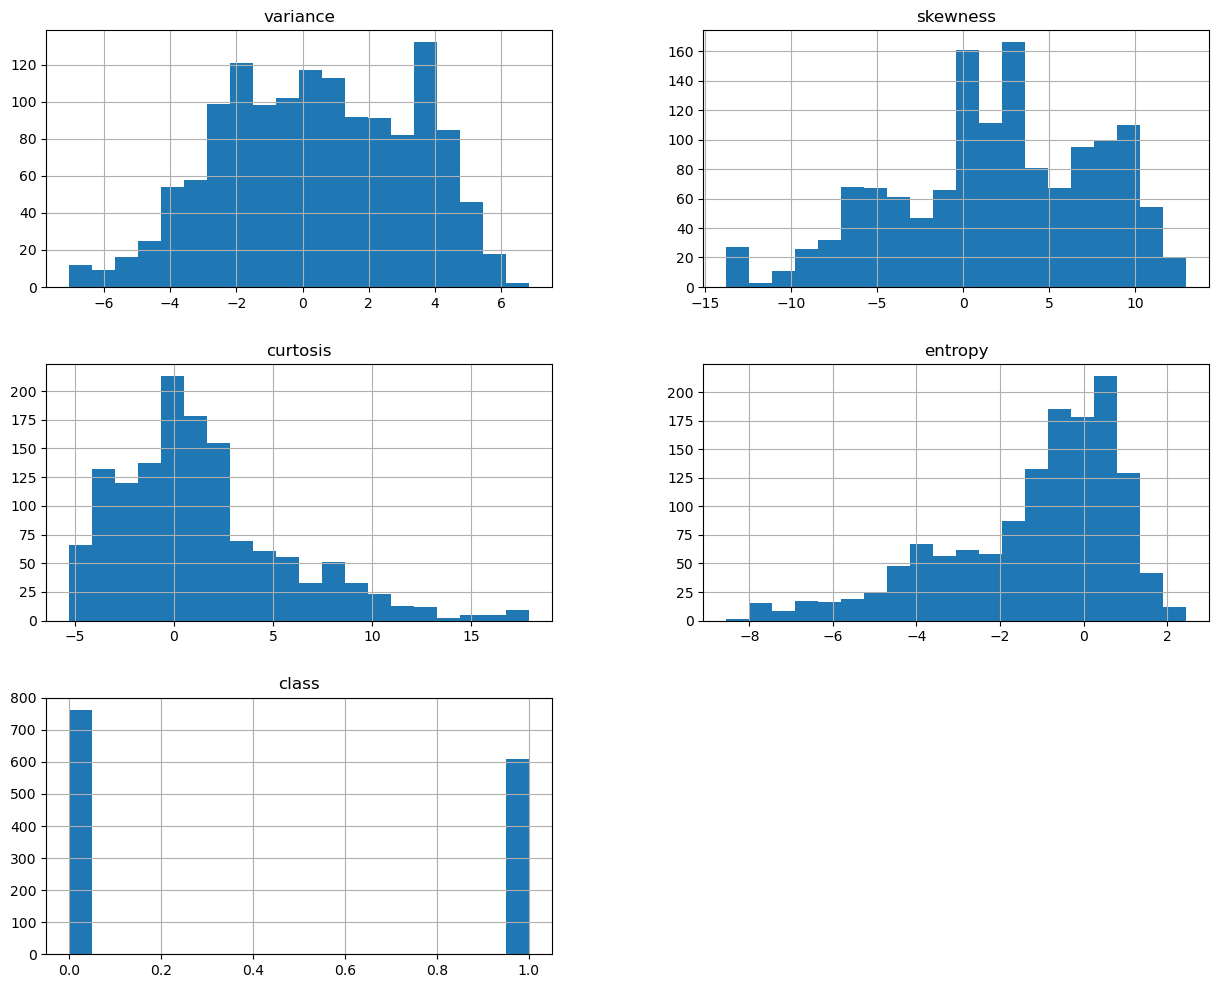

In [10]:
df.hist(bins=20,figsize=(15,12))

### Observation 
*  Ploted the histogram to visualize the distribution of data and it's also used to detect the outliers and to see the skewness of the data
*  As we can see that curtosis and entropy are Skewed data and contain outliers 

## Statistical information 

In [11]:
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


## Bivariate Analysis

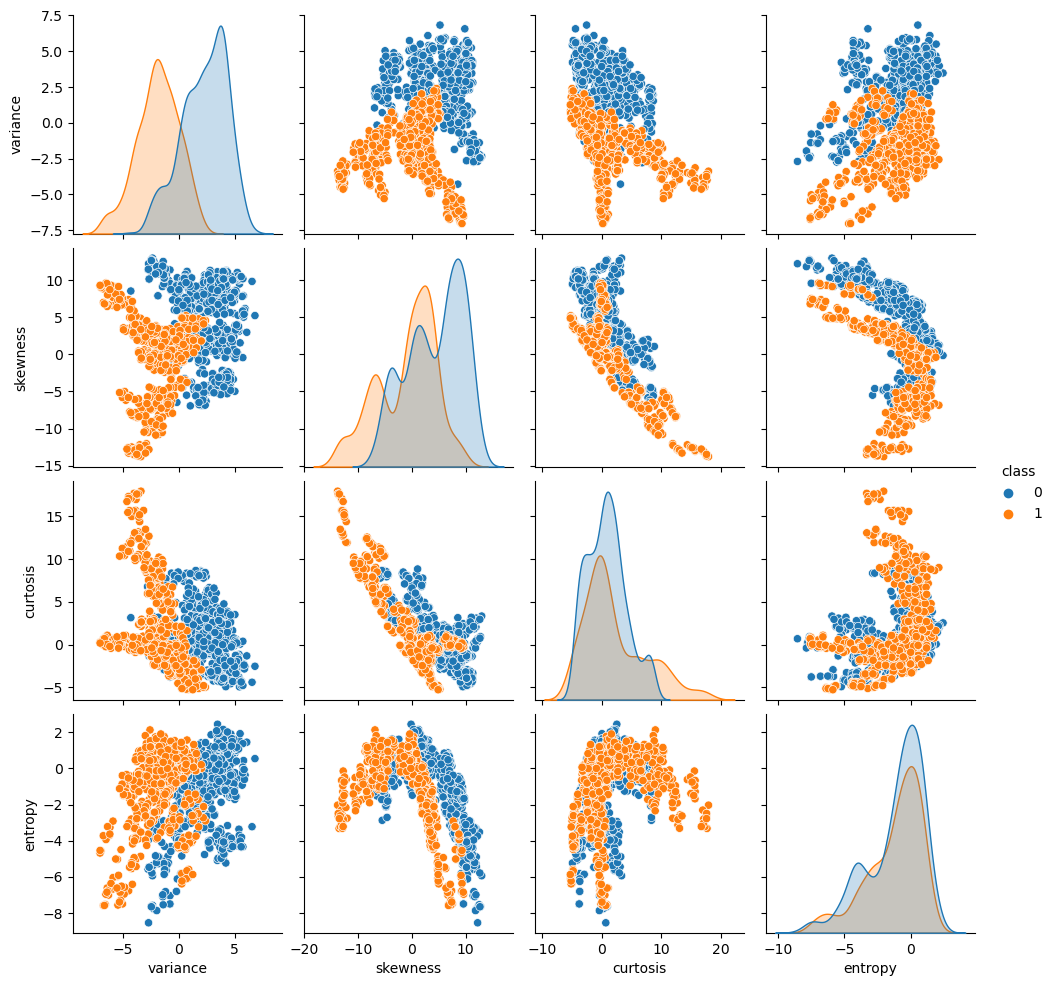

In [12]:
sns.pairplot (df, hue = 'class')

In [13]:
df.corr()

,variance,skewness,curtosis,entropy,class
variance,1.000000,0.264026,-0.380850,0.276817,-0.724843
skewness,0.264026,1.000000,-0.786895,-0.526321,-0.444688
curtosis,-0.380850,-0.786895,1.000000,0.318841,0.155883
entropy,0.276817,-0.526321,0.318841,1.000000,-0.023424
class,-0.724843,-0.444688,0.155883,-0.023424,1.000000


<AxesSubplot:>

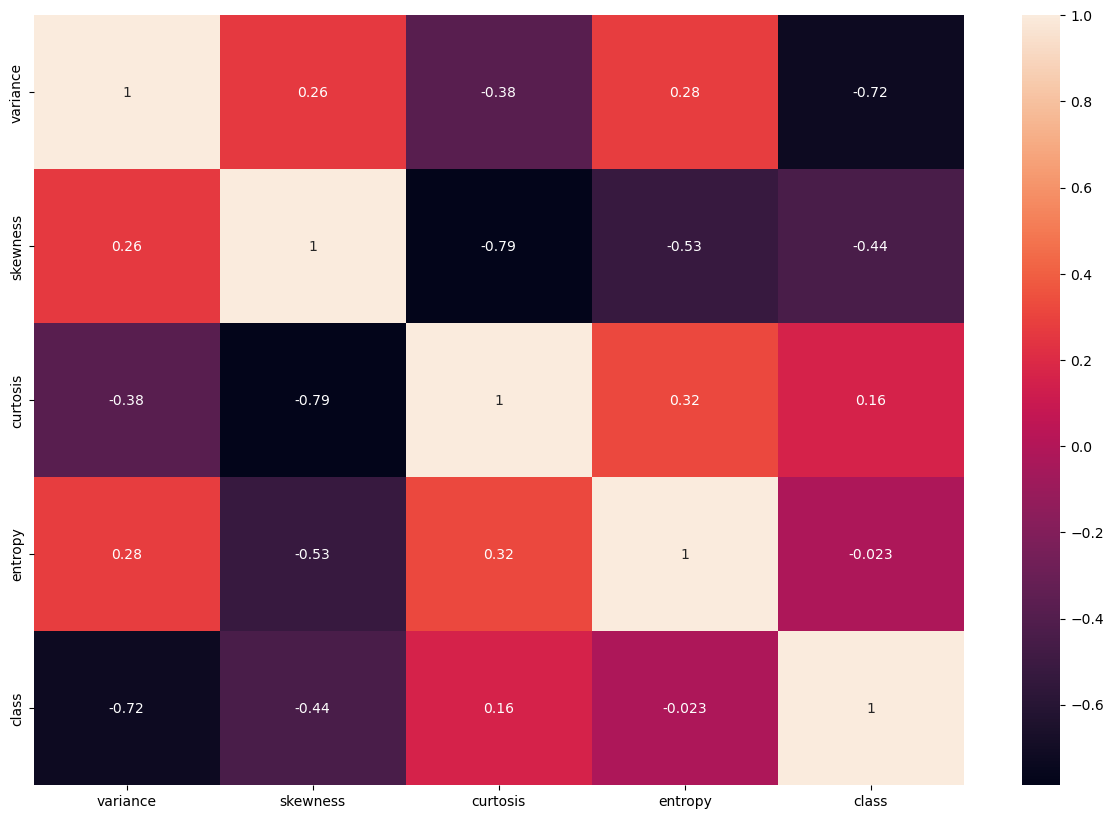

In [14]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

### The relationship between the feature how the points are retated to each other

## outliers handling
#### Ploted the boxplot to check the outliers variance 

<AxesSubplot:xlabel='curtosis'>

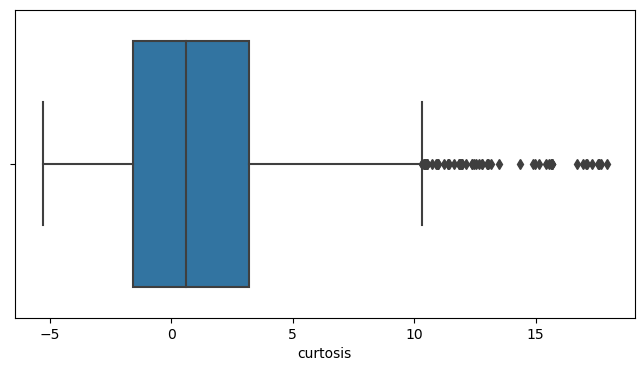

In [15]:
plt.figure(figsize =(8,4))
sns.boxplot(x = 'curtosis', data=df,orient='h')

<AxesSubplot:xlabel='entropy'>

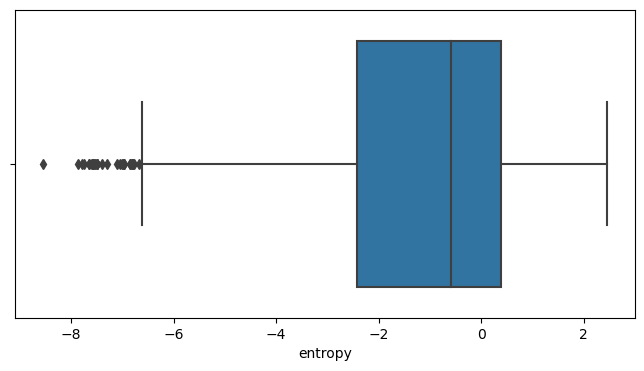

In [16]:
plt.figure(figsize =(8,4))
sns.boxplot(x = 'entropy', data=df,orient='h')

## Inter Quartile Range

In [17]:
for colname,colvals in df.iteritems():
    if df[colname].dtype!=object and colname!='class':
        Q1=df[colname].quantile(q=0.25)
        Q3=df[colname].quantile(q=0.75)
        IQR=Q3-Q1
        low=Q1-(1.5*IQR)
        up=Q3+(1.5*IQR)
        df.loc[(df[colname]<low) | (df[colname]>up) ,colname]=df[colname].median()
    else:
        continue

<AxesSubplot:xlabel='entropy'>

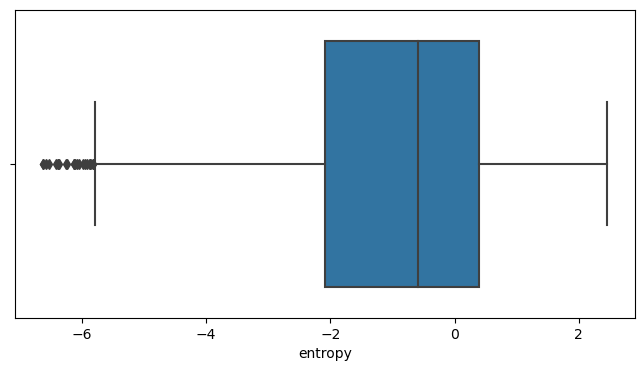

In [18]:
plt.figure(figsize =(8,4))
sns.boxplot(x = 'entropy', data=df,orient='h')

<AxesSubplot:xlabel='curtosis'>

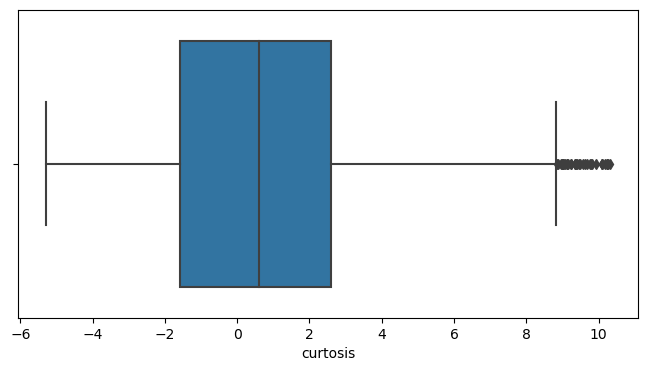

In [19]:
plt.figure(figsize =(8,4))
sns.boxplot(x = 'curtosis', data=df,orient='h')

#### Observation 
* The outliers has been compriesd with the help of inter quartile range 
* The outliers have filled with the median value 

## Visual of label which will define note is real or fake

<AxesSubplot:xlabel='class', ylabel='count'>

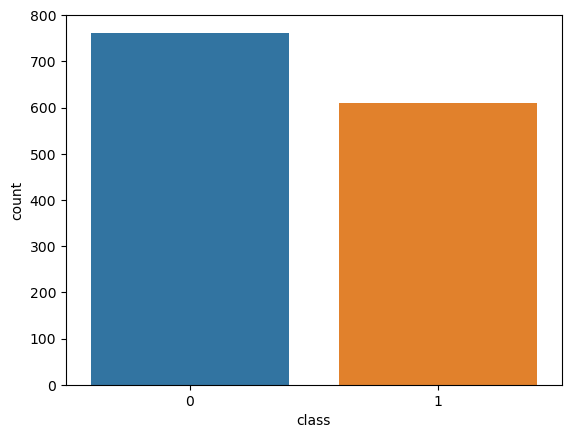

In [20]:
sns.countplot(df['class'])

#### Observation 
* the data is distributed in 0 and 1
* the 0 are fake and 1 is consider as real 

## The model is ready for machine learning algorithms

### The training set is used to train the machine learning algorithms while the test set is used to evaluate the performance of the machine learning algorithms.

In [21]:
X = df.drop(['class'],axis=1)
y = df['class']

### Splitting the data into train and test

In [22]:
from sklearn.model_selection import train_test_split

X_train , X_test, y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## K-Nearest Neighbor

In [23]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train,y_train)

KNeighborsClassifier()

In [24]:
print('knn_train_score:',knn.score(X_train,y_train))
Knn_score = knn.score(X_test,y_test)
print('Knn_test_score',Knn_score)

knn_train_score: 0.9990884229717412
Knn_test_score 1.0


## Naive Baye's theorem

In [25]:
from sklearn.naive_bayes import GaussianNB

GNB = GaussianNB()

GNB.fit(X_train,y_train)

GaussianNB()

In [26]:
GNB.score(X_train,y_train)

0.8714676390154968

In [27]:
naive_bayes = GNB.score(X_test,y_test)
naive_bayes

0.8181818181818182

## Logistic Regression 

In [28]:
from sklearn.linear_model import LogisticRegression

Log_reg = LogisticRegression()
Log_reg.fit(X_train,y_train)

LogisticRegression()

In [29]:
y_train_pred = Log_reg.predict(X_train)
y_test_pred = Log_reg.predict(X_test)

In [30]:
from sklearn import metrics 
print('Accuracy_train:',metrics.accuracy_score(y_train,y_train_pred))
print('Accuracy_test:',metrics.accuracy_score(y_test,y_test_pred))

Accuracy_train: 0.9972652689152234
Accuracy_test: 0.9818181818181818


In [31]:
logs_reg = metrics.accuracy_score(y_test,y_test_pred)
logs_reg

0.9818181818181818

In [32]:
print('Accuracy:',metrics.accuracy_score(y_test,y_test_pred))
precision = metrics.precision_score(y_test,y_test_pred)
Recall = metrics.recall_score(y_test,y_test_pred)
print('precision:',precision)
print('Recall:',Recall)

Accuracy: 0.9818181818181818
precision: 0.9841269841269841
Recall: 0.9763779527559056


In [33]:
result = metrics.classification_report(y_test , y_test_pred)

print(result)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       148
           1       0.98      0.98      0.98       127

    accuracy                           0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275



## Cross validation 

In [34]:
from sklearn.model_selection import cross_val_score

cvs = cross_val_score(Log_reg,X_train,y_train,cv=10)

cvs

array([0.99090909, 1.        , 1.        , 0.99090909, 0.99090909,
       1.        , 1.        , 0.99082569, 1.        , 1.        ])

In [35]:
cvs_ = cvs.mean()
cvs_

0.9963552960800668

## Confusion matrix

In [36]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_test_pred)
cnf_matrix

array([[146,   2],
       [  3, 124]], dtype=int64)

In [37]:
cnf_metrix_train=confusion_matrix(y_train,y_train_pred)
cnf_metrix_train

array([[611,   3],
       [  0, 483]], dtype=int64)

<AxesSubplot:>

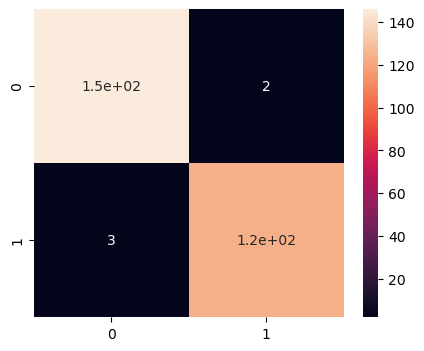

In [38]:
plt.figure(figsize=(5,4))
sns.heatmap(cnf_matrix,annot=True)

## Decision Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(max_depth =2,criterion='entropy',random_state=42)

dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

In [40]:
y_train_pred = dt_clf.predict(X_train)
y_test_pred = dt_clf.predict(X_test)

In [41]:
print('Accuracy',metrics.accuracy_score(y_train,y_train_pred))
print('Accuracy',metrics.accuracy_score(y_test,y_test_pred))

Accuracy 0.9070191431175935
Accuracy 0.850909090909091


In [42]:
dtr_clf = metrics.accuracy_score(y_test,y_test_pred)
dtr_clf

0.850909090909091

## Random Forests

In [43]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=50,random_state=42)

rf_clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [44]:
y_pred = rf_clf.predict(X_test)

In [45]:
rft_clf = metrics.accuracy_score(y_test,y_pred)
rft_clf

0.9927272727272727

# Ensemble Technique 

## Bagging Classifier

In [46]:
from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(),n_estimators=50,random_state=42,bootstrap=True,n_jobs=-1)

bag_clf.fit(X_train,y_train)
y_pred = bag_clf.predict(X_test)
bag_clf = metrics.accuracy_score(y_pred,y_test)
bag_clf

1.0

In [47]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[148,   0],
       [  0, 127]], dtype=int64)

<AxesSubplot:>

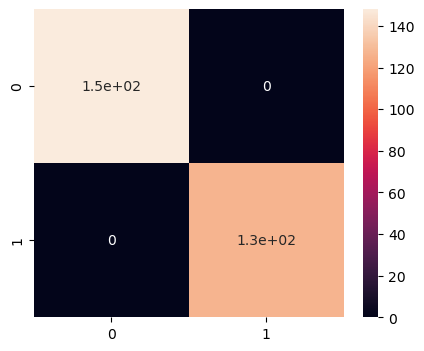

In [48]:
plt.figure(figsize=(5,4))
sns.heatmap(cnf_matrix,annot=True)

In [49]:
result = metrics.classification_report(y_test, y_pred)
print(result)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       148
           1       1.00      1.00      1.00       127

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



## Pasting 

In [50]:
from sklearn.ensemble import BaggingClassifier

past_clf = BaggingClassifier(DecisionTreeClassifier(),n_estimators=100,random_state=42,bootstrap=False,n_jobs=-1)

past_clf.fit(X_train,y_train)
y_pred = past_clf.predict(X_test)
past_clf = metrics.accuracy_score(y_pred,y_test)
past_clf

0.9745454545454545

## Support Voting Classifier

In [51]:
from sklearn.svm import SVC

rf_clf = RandomForestClassifier(random_state=100)
log_reg = LogisticRegression(random_state=100)
svm_clf = SVC(random_state=42,probability=True)
dt_clf = DecisionTreeClassifier(random_state=100)
# knn_clf  = KNeighborsClassifier()

from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[('lr',log_reg),('rf',rf_clf),('svc',svm_clf),('dt',dt_clf)],voting='soft',n_jobs = -1)

voting_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=100)),
                             ('rf', RandomForestClassifier(random_state=100)),
                             ('svc', SVC(probability=True, random_state=42)),
                             ('dt', DecisionTreeClassifier(random_state=100))],
                 n_jobs=-1, voting='soft')

In [52]:
from sklearn.metrics import accuracy_score

for clf in (log_reg, rf_clf, svm_clf, dt_clf, voting_clf):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__,accuracy_score(y_test ,y_pred))

LogisticRegression 0.9818181818181818
RandomForestClassifier 0.9927272727272727
SVC 1.0
DecisionTreeClassifier 0.9781818181818182
VotingClassifier 1.0


In [53]:
svm_clf = metrics.accuracy_score(y_test,y_test_pred)
svm_clf

0.850909090909091

## ADABOOSTING

In [54]:
from sklearn.ensemble import AdaBoostClassifier

adaboost = AdaBoostClassifier(random_state=40)

adaboost.fit(X_train,y_train)

AdaBoostClassifier(random_state=40)

In [55]:
y_pred_adb = adaboost.predict(X_test)

In [56]:
adaboost = metrics.accuracy_score(y_test,y_pred_adb)
adaboost

0.9927272727272727

## Gradient Boosting 

In [57]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf  = GradientBoostingClassifier(learning_rate=0.1,random_state=40)
gb_clf.fit(X_train,y_train)
y_predict = gb_clf.predict(X_test)

In [58]:
Gboost = metrics.accuracy_score(y_test,y_predict)
Gboost

1.0

## Accuracy

In [59]:
data = {'Accuracies':['K-Nearest Neighbor','LogisticRegression','DecisionTreeClassifier','naive_bayes','RandomForestClassifier','BaggingClassifier','Pasting','AdaBoostClassifier','GradientBoostingClassifier','Support vector machine'],
        'Test Accuracy':[Knn_score,logs_reg,dtr_clf,naive_bayes,rft_clf,bag_clf,past_clf,adaboost,Gboost,svm_clf]}
accuracy = pd.DataFrame(data)
accuracy

,Accuracies,Test Accuracy
0,K-Nearest Neighbor,1.000000
1,LogisticRegression,0.981818
2,DecisionTreeClassifier,0.850909
3,naive_bayes,0.818182
4,RandomForestClassifier,0.992727
5,BaggingClassifier,1.000000
6,Pasting,0.974545
7,AdaBoostClassifier,0.992727
8,GradientBoostingClassifier,1.000000
9,Support vector machine,0.850909


## *Conclusion 
#### RandomForestClassifier is giving the best accuracy 0.99% 

# Great Job!